In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('blinkit_data.csv')

In [7]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [11]:
df.shape

(8523, 12)

In [12]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [14]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

# Data Cleaning Start

df['Item Fat Content'].unique()

In [17]:
# we need to replace 'LF' & 'low fat' with 'Low Fat' and 'reg' to 'Regular'
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                     'low fat': 'Low Fat',
                                                     'reg':'Regular'})

In [18]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## Business Requirements

### KPI

In [28]:
# Total sales
total_sales=df['Sales'].sum()
print("Total sales:",total_sales)

# Average sales
avg_sales=df['Sales'].mean()
print("Average sales",avg_sales)

# No. of Items Sold
no_of_items_sold=df['Sales'].count()
print("No. of Items Sold ",no_of_items_sold)

# Average ratings
avg_rating=df['Rating'].mean()
print("Average Rating",avg_rating)

Total sales: 1201681.4808
Average sales 140.9927819781767
No. of Items Sold  8523
Average Rating 3.965857092573038


## Charts Requirements

#### Total Sales by Fat content 

Text(0.5, 1.0, 'Sales by Fat Content')

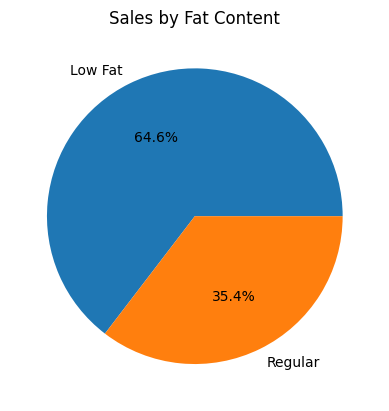

In [77]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct='%.1f%%')
plt.title('Sales by Fat Content')

#### Total Sales by item Type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

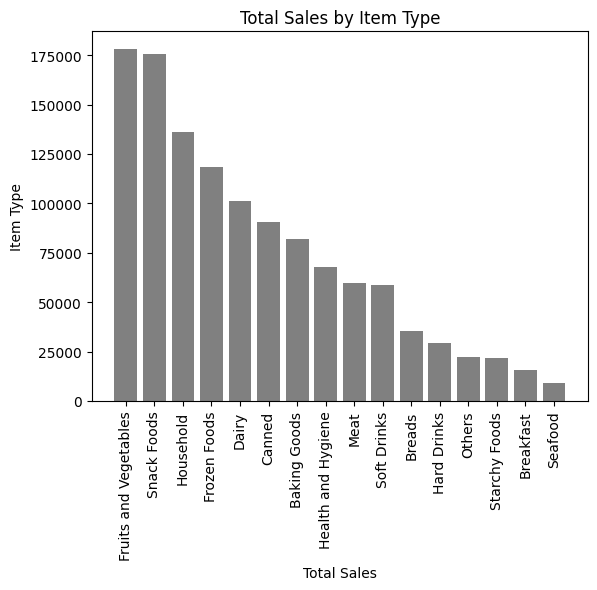

In [89]:
sales_item_type= df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,6))
plt.bar(sales_item_type.index, sales_item_type.values,color='grey')
plt.xlabel("Total Sales")
plt.ylabel("Item Type")
plt.title("Total Sales by Item Type")
plt.xticks(rotation=90)
# plt.yticks(rotation=40)

#### Fat content by outlet

Text(0.5, 1.0, 'Outlet Tier By Item Fat Content')

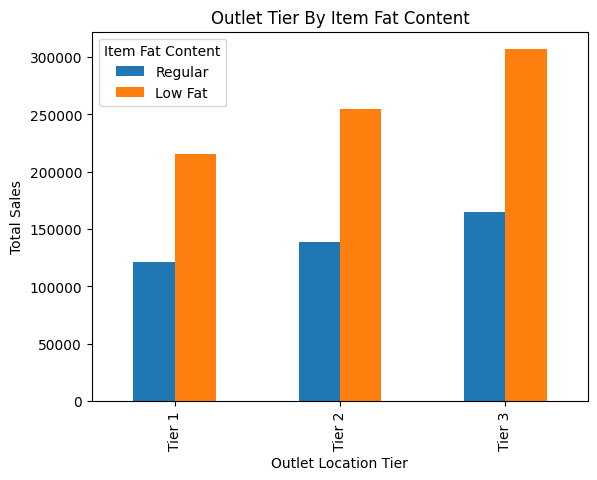

In [126]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack() # unstack() - is used as there is two value regular & Low Fat , so this will separte two coloumn otherwise both are overlapping on each other
grouped = grouped[['Regular','Low Fat']]
grouped.plot(kind='bar')
# grouped[['Regular','Low Fat']].plot(kind='bar', color=['Orange','blue'])
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
# plt.legend(title='Item Fat Content')
plt.title("Outlet Tier By Item Fat Content")

### Total sales by outlet establishment

Text(0.5, 1.0, 'Outlet Establishment')

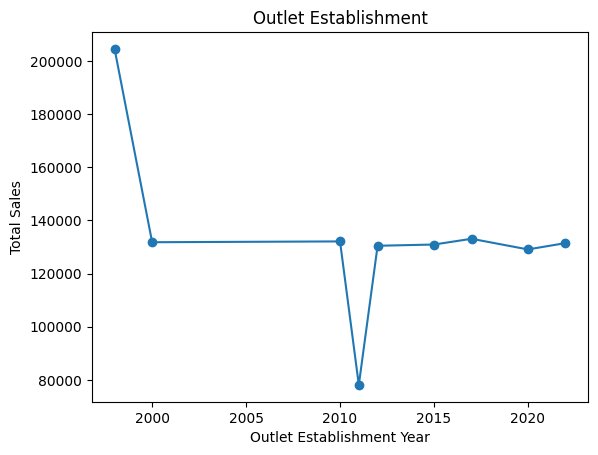

In [141]:
sales_by_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum()
plt.plot(sales_by_establishment.index, sales_by_establishment.values, marker='o', linestyle='-')
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Outlet Establishment")

### Sales by outlet size

Text(0.5, 1.0, 'Sales by outlet size')

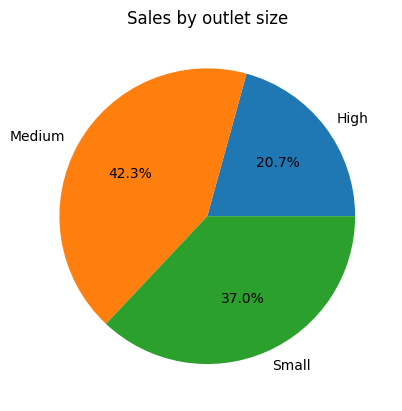

In [146]:
outlet_size = df.groupby('Outlet Size')['Sales'].sum()
plt.pie(outlet_size, labels = outlet_size.index, autopct='%.1f%%')
plt.title('Sales by outlet size')

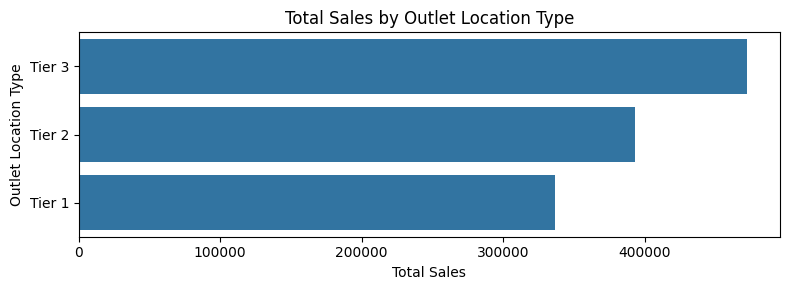

In [161]:
sales_by_location =df.groupby('Outlet Location Type')["Sales"].sum().reset_index() 
sales_by_location= sales_by_location.sort_values("Sales", ascending= False)

plt.figure(figsize=(8, 3)) #Smaller height, enough width

sns.barplot(x="Sales", y='Outlet Location Type', data=sales_by_location)
plt.title("Total Sales by Outlet Location Type")
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()  # ensure layout fits without scroll